In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [2]:
data = pd.read_csv('music_genre.csv')
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
data.shape

(50005, 18)

In [4]:
data = data.dropna()
data = data.drop(columns=['instance_id','artist_name','track_name','popularity','duration_ms','key','mode','obtained_date'])
data = data.reset_index(drop=True)

In [5]:
data.shape

(50000, 10)

In [6]:
data = data.drop(data[data["tempo"] == "?"].index)
data["tempo"] = data["tempo"].astype("float")

In [7]:
idx = []
lt = list(data['tempo'])
for i in range(len(lt)):
    if(lt[i] == '?'):
        idx.append(i)
data = data.drop(idx)
data = data.reset_index(drop=True)

In [9]:
numeric_features = data.drop("music_genre", axis = 1)

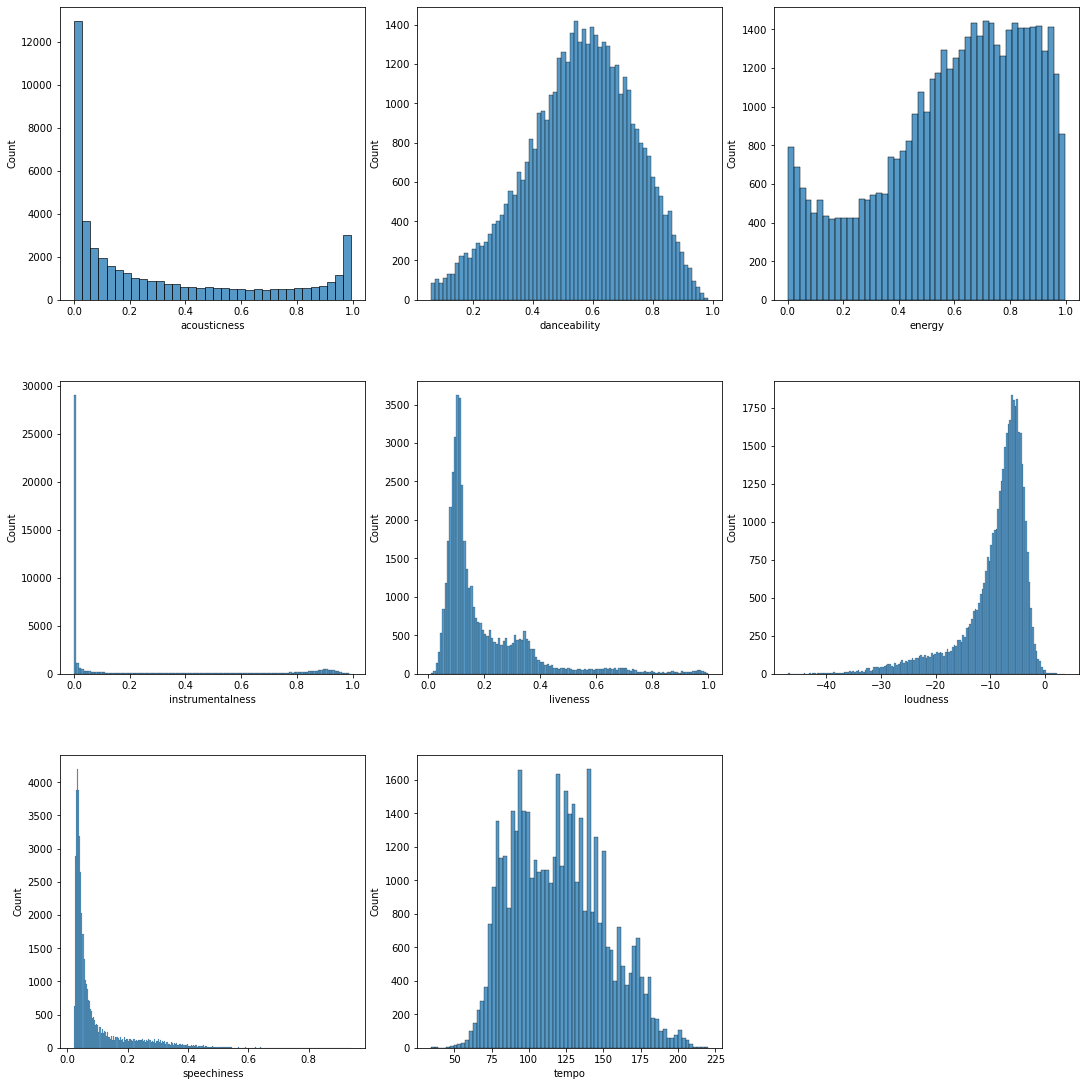

In [10]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (15, 15))
fig.delaxes(axs[2][2])
index = 0

axs = axs.flatten()
for k, v in numeric_features.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Text(0.5, 1.0, 'Valence')

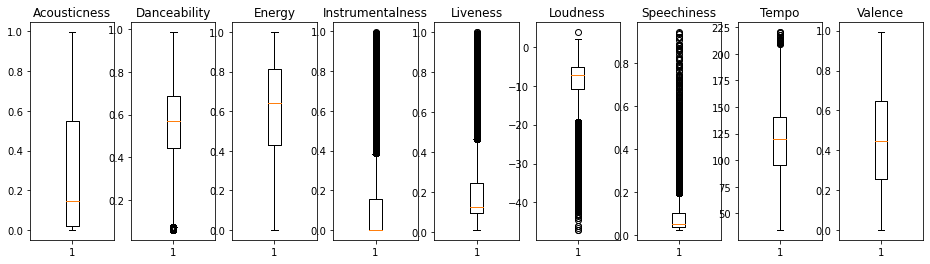

In [11]:
fig, ax = plt.subplots(1,9,figsize=(16,4))
ax[0].boxplot(data.acousticness)
ax[0].set_title("Acousticness")

ax[1].boxplot(list(data.danceability))
ax[1].set_title("Danceability")

ax[2].boxplot(data.energy)
ax[2].set_title("Energy")

ax[3].boxplot(list(data.instrumentalness))
ax[3].set_title("Instrumentalness")

ax[4].boxplot(list(data.liveness))
ax[4].set_title("Liveness")

ax[5].boxplot(list(data.loudness))
ax[5].set_title("Loudness")

ax[6].boxplot(list(data.speechiness))
ax[6].set_title("Speechiness")

ax[7].boxplot(list(data.tempo))
ax[7].set_title("Tempo")

ax[8].boxplot(data.valence)
ax[8].set_title("Valence")

In [12]:
genre_encoder = LabelEncoder()
data["music_genre"] = genre_encoder.fit_transform(data["music_genre"])

In [13]:
y = data[['music_genre']].to_numpy()
data = data.drop(columns=['music_genre'])

In [14]:
x = data.values
columns = data.columns

scaler = preprocessing.MinMaxScaler()
tmp = scaler.fit_transform(x)
data = pd.DataFrame(tmp)
data.columns = columns

x = data.to_numpy()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.85,random_state=1)

In [16]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

<ipython-input-16-bbd7d8e1ee00>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [17]:
print('Train data\'s Accuracy: ', format(rf.score(x_train, y_train)))

Train data's Accuracy:  0.7929286477623899


In [18]:
y_predict = rf.predict(x_test)

In [19]:
print('Test data\'s Accuracy: ', format(rf.score(x_test,y_test)))
print('Test data\'s Accuracy: ', format(r2_score(y_test,rf.predict(x_test))))

Test data's Accuracy:  0.021571195482607886
Test data's Accuracy:  0.021571195482607886


In [20]:
mean_absolute_error(y_test, y_predict)

2.210975246745127